In [21]:
import numpy as np
import pandas as pd
import nltk
import random

stopwords = nltk.corpus.stopwords.words('english')
from pywsd.utils import lemmatize_sentence
import re
regex = re.compile('[^a-zA-Z ]')

from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()


In [2]:
# functions for txt file of a text
def load_dict(path):
    slovarik = np.load(path, allow_pickle = True)
    slovarik = slovarik.tolist()
    return slovarik

def read_data(title_path):
    if(title_path[-1] == 't'):
        with open(title_path, "r", encoding ="utf8") as current_file:
            text = current_file.read()
        return text
    else:
        data = pd.read_csv('../../../data_jokes_eng_new.csv')
        data = data.reset_index()
        data = data.dropna()
        return data
        
def remove_stopwords(book_sw):
    book_sw = ' '.join([word for word in book_sw.split() if word not in stopwords])
    return book_sw
def lemmatize_sents(subsample):
    for i in range(len(subsample)):
        subsample[i] = regex.sub(' ', subsample[i])
        subsample[i] = lemmatize_sentence(subsample[i])
    return subsample

def lemmatized_to_coords(text,slovarik):
    coords = []
    for i in text:
        temp = []
        for j in i:
            print(j)
            try:
                temp.append(slovarik[j])
            except KeyError:
                ok = True
        coords.append(coords)
    return coords

In [61]:
#functions for anecdotes ( in english rn )
def anecdote_reader(series,n_gramm):
    res = []
    for i in range(len(series)):
        temp = []
        for j in range(len(series[i].split())):
            if j %(16*n_gramm) == 0:
                temp.append(series[i].split()[j - 16*n_gramm:j])
        res.append(temp)
    return np.asarray(res,dtype=object)


def anec_cleaner(raw_data,lemmatizer,language='english'):
    
    '''
    
    Turns a List (series,array e.t.c) of Raw Jokes to 
    a list of format ['lemmatized joke']
    Only words recognied by positional tagger are added to the output
    All of the resulting jokes are preprocesses not to include stop words from NLTK stopwords

    Parameters:
    lemmatizer - NLTK Lemmatizer for the language
    raw_data - array-like data of strings with raw data
    language - the language of the raw jokes
    Output - cleaned list of lemmatized jokes

    '''
    from nltk.tokenize import word_tokenize
    from nltk import pos_tag
    stopwords = nltk.corpus.stopwords.words(language)
    clean_data = []
    for i in range(len(raw_data)):
        raw_data[i] = regex.sub(' ', raw_data[i])
        anec = ''
        for token in word_tokenize(raw_data[i]):
            tag = pos_tag([token])
            tag = tag[0][1][0].lower()
            tag = tag if tag in ['a', 'r', 'n', 'v'] else None
            if tag and token not in stopwords:
                anec +=' ' + lemmatizer.lemmatize(token,tag) + ' '
            else: continue
        clean_data.append(anec)
    return clean_data


def percentage_metric(data,dictionary,reverse = False): 
    '''
    
    Function to compute data consistency according to SVD Dictionary
    Arguments:
    data - lemmatized and cleaned jokes
    dicitonary - your SVD dictionary
    reverse - if set true, the items in the result will be of the vice-versa order
    output - dictionary of the format {percentage_of_words_not_in_SVD: number_of_jokes}
    
    '''
    absolute_dict = {}
    relative_dict = {}
    for i in range(len(data)):
        for token in data[i].split():
            if(token not in dictionary.keys()):
                if(token not in absolute_dict.keys()):
                    absolute_dict[i] = 1
                else: 
                    absolute_dict[i] += 1
    
    for i in absolute_dict.keys():
        if round(len(data[i].split())/absolute_dict[i],0) not in relative_dict.keys():
            relative_dict[round(len(data[i].split())/absolute_dict[i],0)] =1
        else: relative_dict[round(len(data[i].split())/absolute_dict[i],0)]+=1
    if reverse:
        res = sorted(dict((v,k) for k,v in relative_dict.items()).items(),reverse=True)
        return res
    else:
        return relative_dict

In [4]:
slovarik = load_dict('english_newlit_SVD_dict.npy')
data = pd.read_csv('../../../data_jokes_eng_new.csv')

/var/folders/kt/8pnx4rb10372fz63y2z655nh0000gn/T/ipykernel_74227/4289833015.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[i] = regex.sub(' ', raw_data[i])


In [53]:
stats = percentage_metric(data['Joke'],slovarik,False)

In [34]:
data['Joke'] = jokes_lemm
data.to_csv('../../../data_jokes_eng_new.csv')

In [21]:
df_stats = pd.DataFrame(dict_missing_words.keys())
df_stats['counts'] = dict_missing_words.values()
df_stats  =df_stats.sort_values(by=['counts'],ascending=False)
df_stats.to_csv('stats.csv')

In [ ]:
anekdoty = []
for i  in range(len(data['Jokes'])):
    joke = ""
    for token in data['Jokes'][i].split():
        tag = pos_tag([token])
        tag = tag[0][1][0].lower()
        tag = tag if tag in ['a', 'r', 'n', 'v'] else None
        
        if tag:
            
            if(lemmatizer.lemmatize(token,tag) not in slovarik.keys()):
                joke+=' KEYWORD '
            else: joke +=' ' + token + ' '
        else: continue
    anekdoty.append(joke)

In [53]:
new ={}
for i in distr.keys():
    if round(len(data['Jokes'][i].split())/distr[i],2) not in new.keys():
        new[round(len(data['Jokes'][i].split())/distr[i],2)] =1
    else: new[round(len(data['Jokes'][i].split())/distr[i],2)]+=1

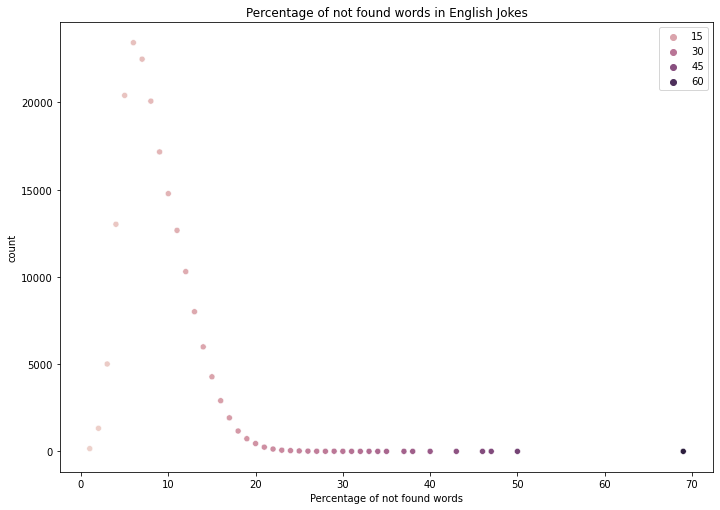

In [55]:
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.scatterplot(x = stats.keys(),y = stats.values(),hue=stats.keys()).set(title='Percentage of not found words in English Jokes',xlabel='Percentage of not found words',ylabel='count');


In [5]:
lens = [len(i.split()) for i in data['Jokes']]

In [6]:
dict_missing_words = {}
for joke in data['Jokes']:
    for token in joke.split():
        tag = pos_tag([token])
        tag = tag[0][1][0].lower()
        tag = tag if tag in ['a', 'r', 'n', 'v'] else None
        if tag:
            if(lemmatizer.lemmatize(token,tag) not in slovarik.keys()):
                if(lemmatizer.lemmatize(token,tag) not in dict_missing_words.keys()):
                    print(token,lemmatizer.lemmatize(token,tag)) 
                    dict_missing_words[WordNetLemmatizer().lemmatize(token,tag)] = 1
                else: 
                    print(token,lemmatizer.lemmatize(token,tag)) 
                    dict_missing_words[WordNetLemmatizer().lemmatize(token,tag)] += 1
        else: continue

18.05162805354468

In [7]:
dict_missing_words = {}
for joke in data['Jokes']:
    for token in joke.split():
        tag = pos_tag([token])
        tag = tag[0][1][0].lower()
        tag = tag if tag in ['a', 'r', 'n', 'v'] else None
        if tag:
            if(lemmatizer.lemmatize(token,tag) not in slovarik.keys()):
                if(lemmatizer.lemmatize(token,tag) not in dict_missing_words.keys()):
                    print(token,lemmatizer.lemmatize(token,tag)) 
                    dict_missing_words[WordNetLemmatizer().lemmatize(token,tag)] = 1
                else: 
                    print(token,lemmatizer.lemmatize(token,tag)) 
                    dict_missing_words[WordNetLemmatizer().lemmatize(token,tag)] += 1
        else: continue

In [58]:
np.mean([len(x.split()) for x in data['Joke']])

8.115537195077204